# Multi-Class Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Loading Iris Dataset

In [3]:
iris=pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Task 1: Create predictors and label**

In [3]:
# Write Code Here
X = iris.drop(['Id','Species'], axis=1)
Y = iris[['Species']]

**Task 2: Split the data with test size 30 and random state 25**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Write Code Here
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=25)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(105, 4) (105, 1)
(45, 4) (45, 1)


**Task 3: Define the model for Random Forest classifier**

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Write the code here
model = RandomForestClassifier(max_depth=3, random_state=25)

**Task 4: Train the model**

In [8]:
# Write the code here
model.fit(xtrain, ytrain)

C:\Users\hassa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

**Task 5: Get the predictions**

In [9]:
# Write the code here
pred = model.predict(xtest)
pred_prb = model.predict(xtrain)

**Task 6: Find the accuracy**

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
#Write the code here
accuracy = accuracy_score(ytest,pred)
print("Accuracy of Multi-Class: {}".format(accuracy))

Accuracy of Multi-Class: 0.9555555555555556


**Task 7: Print Classification Report**

In [12]:
from sklearn.metrics import classification_report

In [13]:
#Write Code here
print(classification_report(ytest,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



### Creating confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
cm = confusion_matrix(ytest, pred) 

In [16]:
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

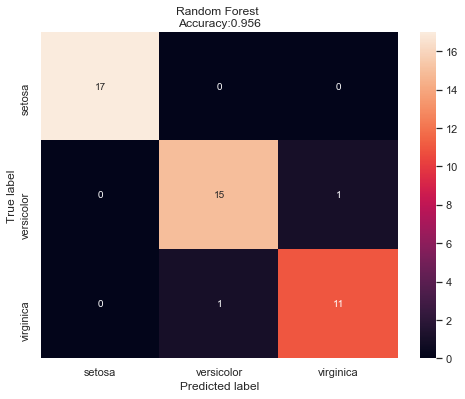

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()